In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('ticks')
sns.set_context('talk')

#this does some important stuff behind the scenes for plotting specifically for jupyter notebooks (same in vscode), ask us if you want to learn more
%matplotlib inline 

In [9]:
genes = ['Scr','Ubx','Dll']

In [3]:
df = pd.read_csv('final results clean.csv')
df

,gene ID,gene name,eye-1,eye-2,eye-3,wing-1,wing-3,wing-4
0,FBgn0085804,CR41571,0,0,0,0,0,0
1,FBgn0267431,CG45784,3,0,1,0,0,0
2,FBgn0039987,CR12798,0,0,0,0,0,0
3,FBgn0058182,CR40182,0,0,0,0,0,0
4,FBgn0267430,CG45783,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
17554,FBgn0085737,CR40502,0,0,0,0,0,0
17555,FBgn0085511,CR40719,0,0,0,0,0,0
17556,FBgn0085766,CR40679,0,0,0,0,0,0
17557,FBgn0085772,CR40743,0,0,0,0,0,0


In [4]:
data = df['gene name'].reset_index().drop(columns='index')
data


,gene name
0,CR41571
1,CG45784
2,CR12798
3,CR40182
4,CG45783
...,...
17554,CR40502
17555,CR40719
17556,CR40679
17557,CR40743


In [5]:
eye_data_mean = df.iloc[:,2:4].mean(axis=1)
wing_data_mean = df.iloc[:,5:7].mean(axis=1)
data.insert(1,"eye_data_mean", eye_data_mean)
data.insert(1,"wing_data_mean", wing_data_mean)



In [6]:
data_tidy = data.melt(
    id_vars=['gene name'],
    var_name='means'
)
data_tidy

,gene name,means,value
0,CR41571,wing_data_mean,0.0
1,CG45784,wing_data_mean,0.0
2,CR12798,wing_data_mean,0.0
3,CR40182,wing_data_mean,0.0
4,CG45783,wing_data_mean,0.0
...,...,...,...
35113,CR40502,eye_data_mean,0.0
35114,CR40719,eye_data_mean,0.0
35115,CR40679,eye_data_mean,0.0
35116,CR40743,eye_data_mean,0.0


In [12]:

data_sample = data_tidy[data_tidy['gene name'].isin(genes)]
data_sample

,gene name,means,value
407,Scr,wing_data_mean,7.5
1902,Ubx,wing_data_mean,153.5
11105,Dll,wing_data_mean,1733.0
17966,Scr,eye_data_mean,297.0
19461,Ubx,eye_data_mean,0.5
28664,Dll,eye_data_mean,1873.5


<AxesSubplot:xlabel='gene name', ylabel='value'>

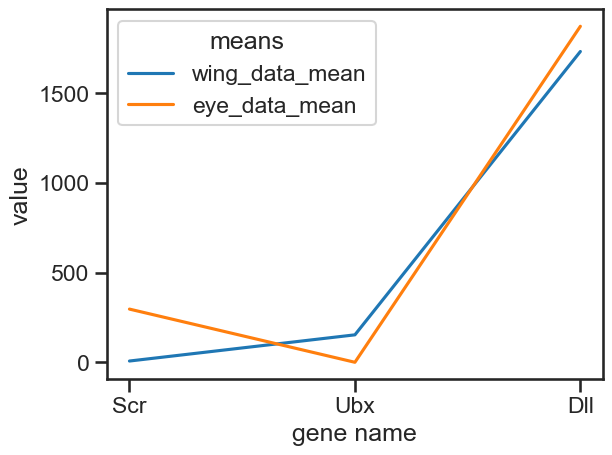

In [13]:
data_sample.sort_values('value')
sns.lineplot(data = data_sample, x = 'gene name', y = 'value', hue='means')
